In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os, gc
import pickle
from tqdm import tqdm_notebook as tqdm


from sklearn import preprocessing

%matplotlib inline

In [2]:
path = '/Users/kanoumotoharu/Downloads/m5-forecasting-accuracy/'

In [3]:
os.listdir(path)

['calendar.csv',
 'sell_prices.csv',
 'sales_train_validation.csv',
 'sample_submission.csv']

In [4]:
%%time
train_df = pd.read_csv(path+'sales_train_validation.csv')
calendar_df = pd.read_csv(path+'calendar.csv')
sell_prices_df = pd.read_csv(path+'sell_prices.csv')
sample_submission_df = pd.read_csv(path+'sample_submission.csv')

CPU times: user 12.5 s, sys: 1.3 s, total: 13.8 s
Wall time: 14 s


In [5]:
train_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [6]:
calendar_df.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [7]:
sell_prices_df.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [8]:
d_cols = [f'd_{i}' for i in range(1,1914)]

In [9]:
data = train_df.set_index('id')[d_cols].T
data.reset_index(drop=True, inplace=True)

In [10]:
calendar_df.date = pd.to_datetime(calendar_df.date)

In [11]:
calendar_df2 = calendar_df[:1913]

In [12]:
data = pd.concat([
    calendar_df2[['date', 'weekday']],
    data
],axis=1)

In [13]:
train_df.store_id.unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

In [16]:
corr_dict = {}
for store in tqdm(train_df.store_id.unique()):
    tmp_df = data.iloc[-84:,data.columns.str.contains(store)]
    mean = tmp_df.mean(axis=0)
    tmp_df = tmp_df.loc[:,mean>1.5]
    corr_dict[store] = tmp_df.iloc[-84:,tmp_df.columns.str.contains(store)].corr()

In [17]:
with open('corr_dict.pkl', mode='wb') as f:
    pickle.dump(corr_dict, f)

In [18]:
"""
for key, value in corr_dict.items():
    plt.figure(figsize=(30,30))
    sns.heatmap(value, cmap='coolwarm', annot=True)
    plt.show()
"""

"\nfor key, value in corr_dict.items():\n    plt.figure(figsize=(30,30))\n    sns.heatmap(value, cmap='coolwarm', annot=True)\n    plt.show()\n"

In [19]:
corr_dict.keys()

dict_keys(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3'])

In [20]:
corr = corr_dict['CA_1']
a = corr[abs(corr)>0.5].isnull().mean(axis=1)
a = a.sort_values()

In [21]:
#data.loc[:, data.columns.str.contains('CA_1')].iloc[-365:,:]

In [22]:
#data.loc[:,a.index[:10]].iloc[-365:,:]

In [23]:
a.head()

FOODS_3_540_CA_1_validation    0.967192
FOODS_3_147_CA_1_validation    0.971129
FOODS_3_592_CA_1_validation    0.972441
FOODS_3_714_CA_1_validation    0.972441
FOODS_3_618_CA_1_validation    0.973753
dtype: float64

In [24]:
del train_df, calendar_df
gc.collect()

38

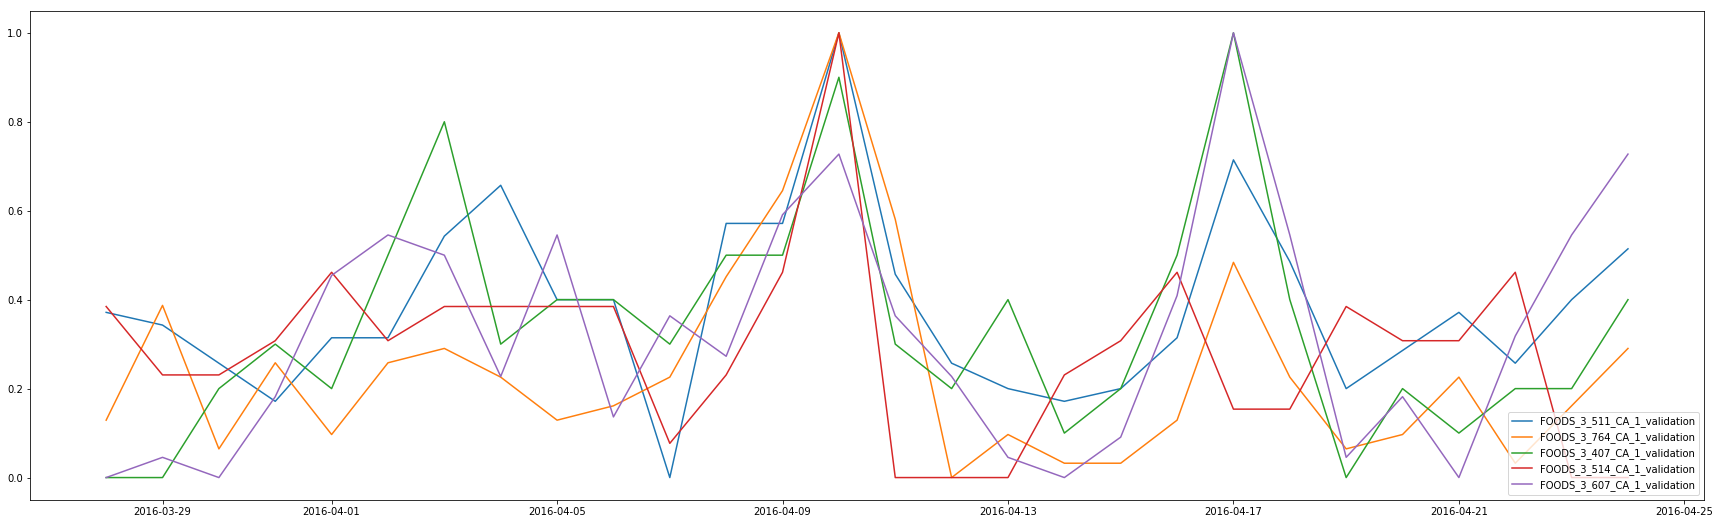

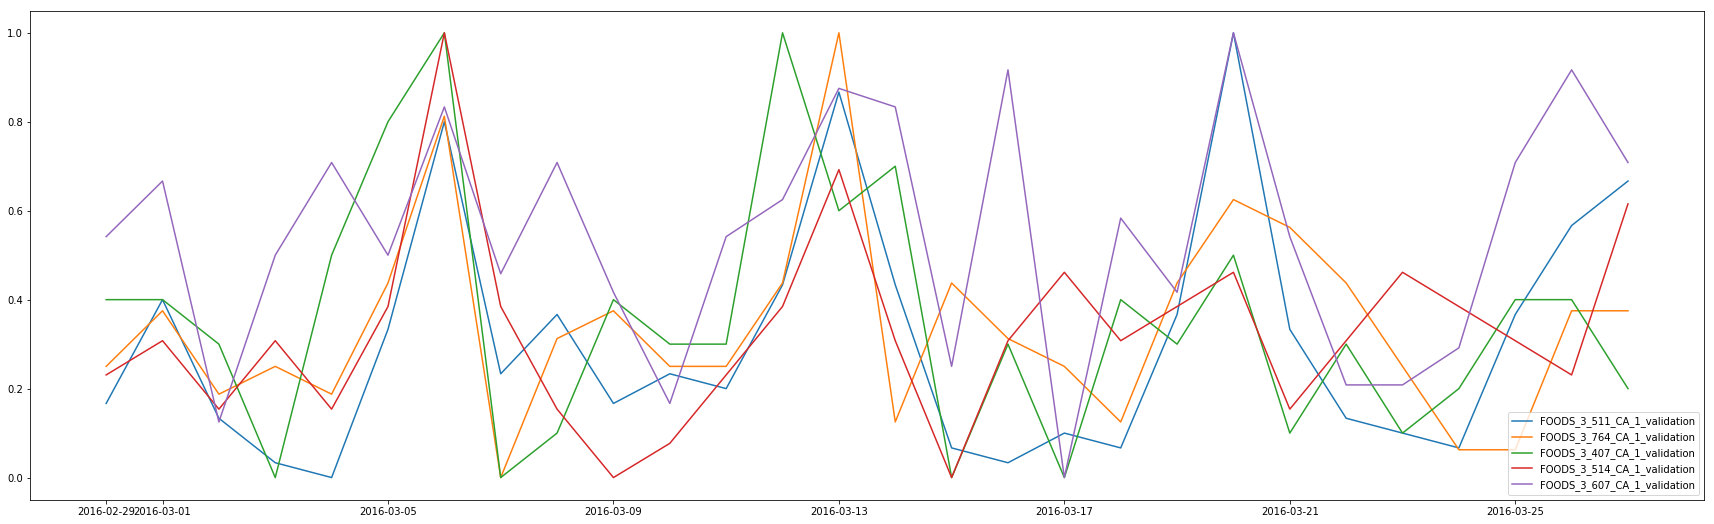

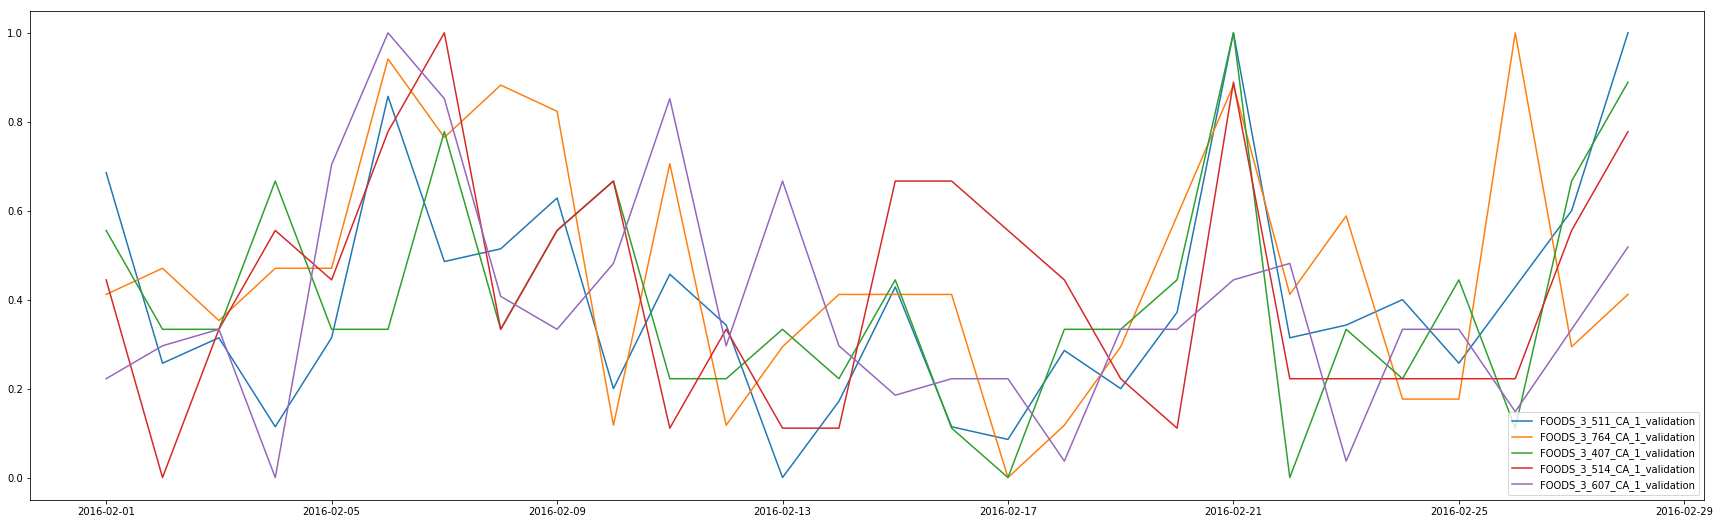

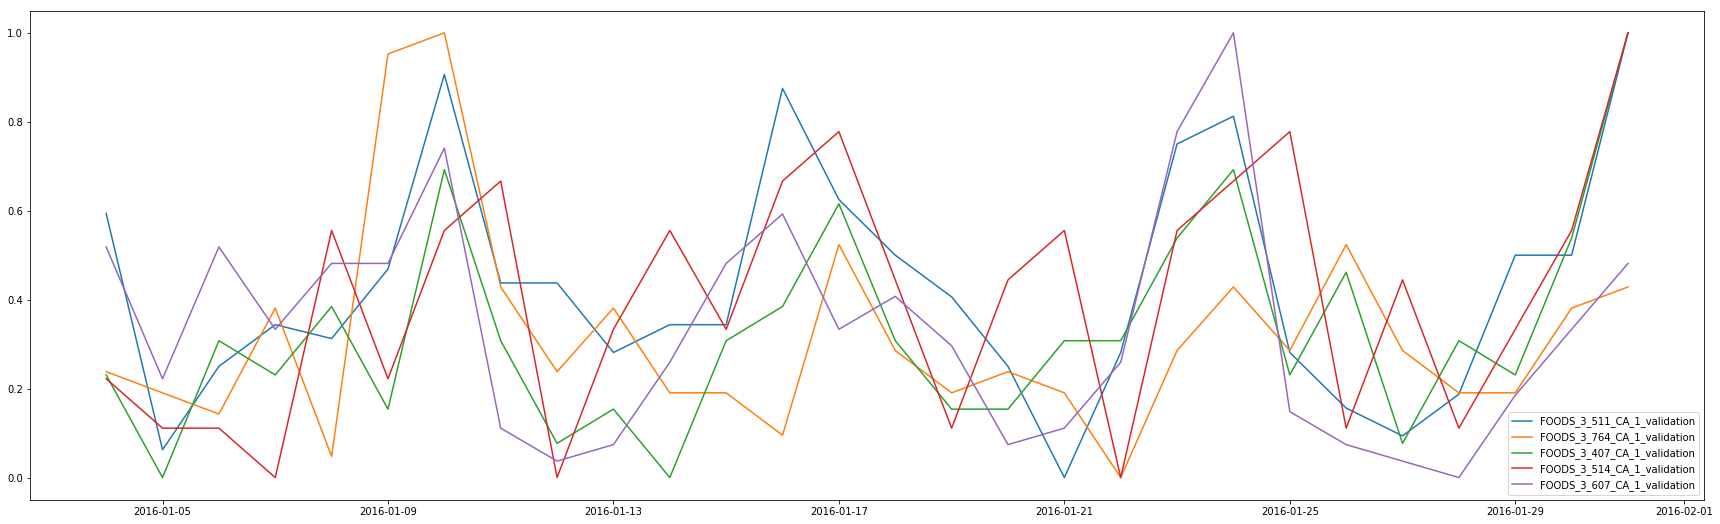

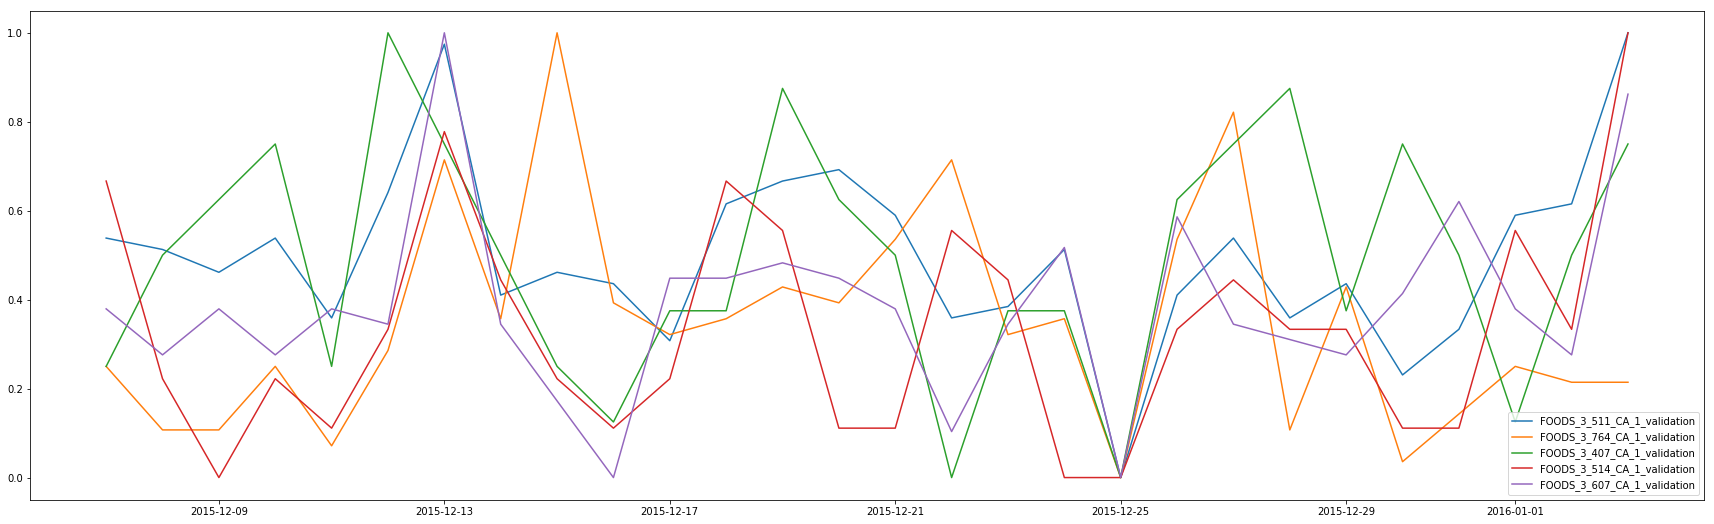

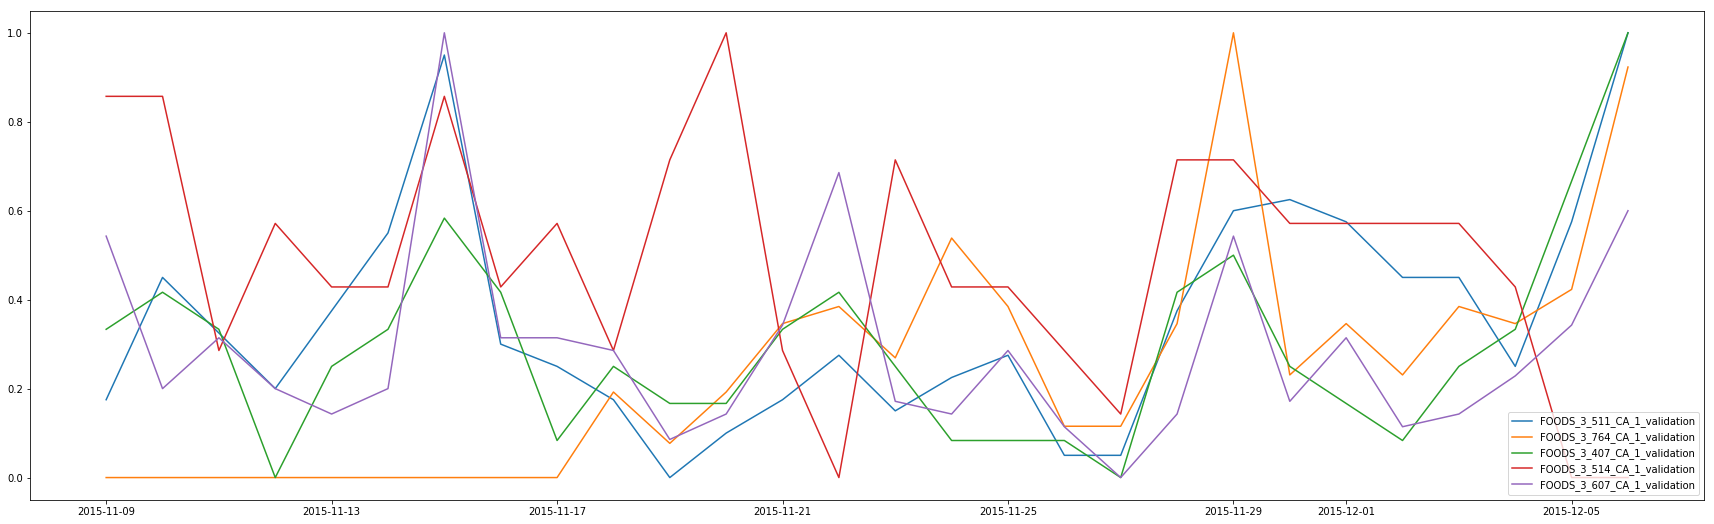

In [25]:
d = 28

prnt_col = 'FOODS_3_511_CA_1_validation'

plt.figure(figsize=(30,9))
for col in corr[prnt_col].sort_values(ascending=False).index[:5]:
    val = preprocessing.minmax_scale(data[col][-d:])
    plt.plot(data.date[-d:], val, label=col)
plt.legend(loc=4)
plt.show()

for i in range(1, 6):
    plt.figure(figsize=(30,9))
    for col in corr[prnt_col].sort_values(ascending=False).index[:5]:
        val = preprocessing.minmax_scale(data[col][-d*(i+1):-d*i])
        plt.plot(data.date[-d*(i+1):-d*(i)], val, label=col)
    plt.legend(loc=4)
    plt.show()

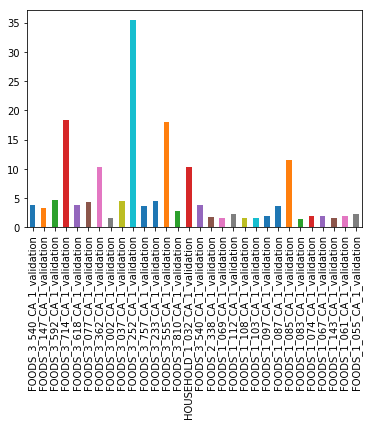

In [26]:
data[a.index].iloc[-84:, [i for i in range(15)]+[-i for i in range(15)]].mean(axis=0).plot('bar')